## Gradio Pets

In [ ]:
 #/default_exp app

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gradio-3.35.2-py3-none-any.whl (19.7 MB)
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached fastapi-0.98.0-py3-none-any.whl (56 kB)
  Using cached ffmpy-0.3.0.tar.gz (4.8 kB)
  Preparing metadata (setup.py) ... done
  Using cached gradio_client-0.2.7-py3-none-any.whl (288 kB)
  Using cached httpx-0.24.1-py3-none-any.whl (75 kB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl (50 kB)
  Using cached orjson-3.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (136 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
#/export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

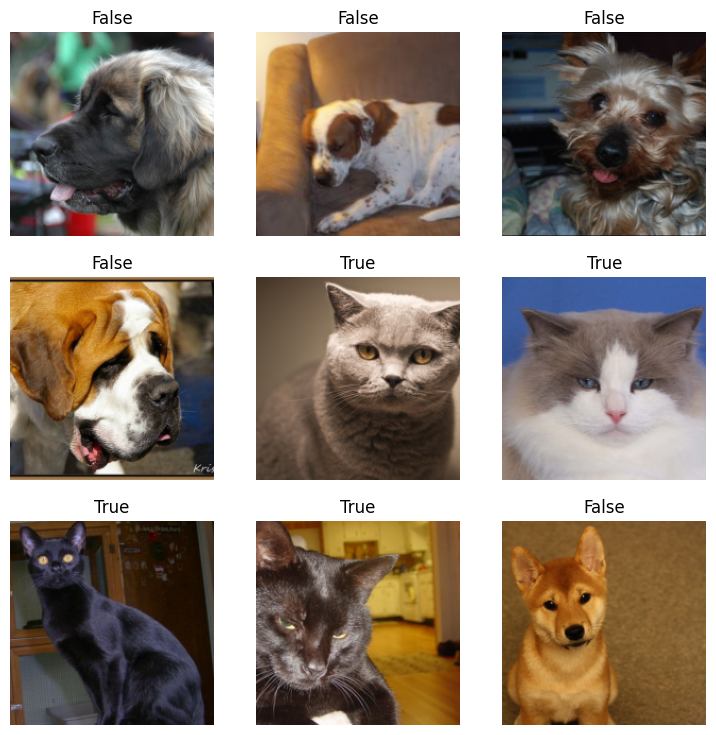

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.21MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.190485,0.052001,0.017591,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.066952,0.045913,0.014208,00:57
1,0.037644,0.049769,0.014885,00:56
2,0.021290,0.035649,0.009472,00:56


In [ ]:
learn.export('model.pkl')

In [ ]:
# end of model creation, start of gradio part using trained model

In [ ]:
#/export
learn = load_learner('model.pkl')

In [ ]:
!pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.5 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('cat photos', max_images=1)
urls[0]

Searching for 'cat photos'


'https://viralcats.net/blog/wp-content/uploads/2020/02/Relaxed-by-Ionut-Donici.jpg'

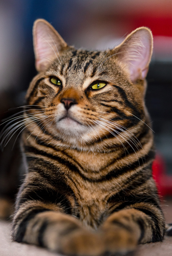

In [ ]:
from fastdownload import download_url
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

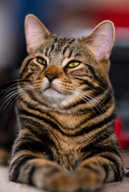

In [ ]:
im_cat = PILImage.create('cat.jpg')
im_cat.thumbnail((192,192))
im_cat

In [ ]:
%time learn.predict(im_cat)

CPU times: user 82 ms, sys: 377 µs, total: 82.3 ms
Wall time: 95.8 ms


('True', tensor(1), tensor([1.1563e-12, 1.0000e+00]))

In [ ]:
#/export
categories = ('Dog', 'Cat')

def classify_image(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories, map(float, probs)))

In [ ]:
classify_image(im)

{'Dog': 2.41270003108196e-12, 'Cat': 1.0}

In [ ]:
#/export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg']
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
interpretation='default'
enable_queue=True

gr.Interface(fn=classify_image, inputs=image, outputs=label, title=title, description=description, article=article, examples=examples, interpretation=interpretation, enable_queue=enable_queue).launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)
<ipython-input-32-54e4cf772452>:11: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  gr.Interface(fn=classify_image, 

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f524251e98aa0b8563.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nbdev.export (from versions: none)
ERROR: No matching distribution found for nbdev.export


In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.948631,0.312958,0.909337,01:42


epoch,train_loss,valid_loss,accuracy,time
0,0.429785,0.286165,0.918133,01:36
